In [23]:
from PIL import Image, ImageDraw, ImageFont
import random
import os

PATH = os.path.expanduser('~/pres_images/')

In [24]:
def make_image(path):
    image = Image.open(path)
    image = image.convert('RGB')
    return image

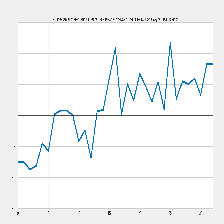

In [25]:
img = make_image(os.path.expanduser('~/graph-trend-understanding/data/train/3.png'))
img.save(PATH + 'transform_original.png')
img

In [494]:
# let's write some transforms! 

In [30]:
def _rand_points(num): 
    return tuple([random.randrange(0, 224+1) for i in range(num)])

def _rand_color(): 
    return tuple([random.randrange(0, 255 + 1) for c in ['r', 'g', 'b']])

In [31]:
def add_text(img): 
    textoptions="ABCDEFGHIJLMNOPQRSTUVXYZabcdefghijklmnopqrstuv0123456789"
    num_strings = random.randrange(0, 5)
    draw = ImageDraw.Draw(img)
    for i in range(num_strings): 
        lenstring = random.randrange(1, 10)
        string = "".join([random.choice(textoptions) for i in range(lenstring)])
        rgb = tuple(_rand_color())
        # we're gonna assume the pics were resized to (224, 224)
        xy = tuple(_rand_points(2))
        fontsize = random.randrange(4, 20+1)
        font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", fontsize)
        # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text(xy, string, rgb,font=font)
    return img

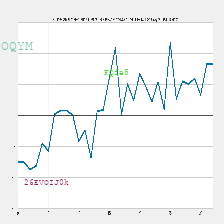

In [37]:
img = make_image('../data/train/3.png')
img = add_text(img)
img.save(PATH + 'transform_letters.png')
img

In [38]:
def rand_add_rect(img): 
    add_rect = random.random() < .5
    if add_rect: 
        xs = sorted(_rand_points(2))
        ys = sorted(_rand_points(2))
        bbox = (xs[0], ys[0], xs[1], ys[1])
        draw = ImageDraw.Draw(img)
        fill = _rand_color()
        outline = _rand_color()
        draw.rectangle(bbox, fill=fill, outline=outline)
    return img

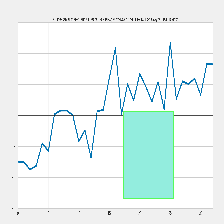

In [108]:
img = make_image('../data/train/3.png')
img = rand_add_rect(img)
img.save(PATH + 'transform_box.png')
img

In [112]:
def _rect_points(start, size): 
    points = [
        start, 
        (start[0] + size, start[1]), 
        (start[0] + size, start[1] + size), 
        (start[0], start[1] + size)
    ]
    return points

def _tri_points(start, size): 
    points = [
        start, 
        (start[0] + size, start[1]), 
        (start[0] + size, start[1] + size)
    ]
    return points 

def rand_add_shapes(img): 
    num_shapes = random.randrange(0, 4 + 1) 
    #num_shapes = 1
    if num_shapes == 0: 
        return img 
    draw = ImageDraw.Draw(img)
    for i in range(num_shapes): 
        size = random.randrange(10, 30)
        start = _rand_points(2)
        is_triangle = random.random() < .5
        if is_triangle: 
            points = _tri_points(start, size)
        else: 
            points = _rect_points(start, size)
        fill = _rand_color()
        outline = _rand_color()
        draw.polygon(tuple(points), fill=fill, outline=outline)
    return img

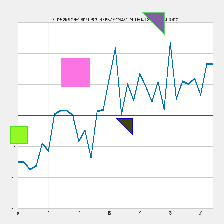

In [128]:
img = make_image('../data/train/3.png')
img = rand_add_shapes(img)
img.save(PATH + 'transform_shapes.png')
img

In [118]:
def _get_white_noise_image(width=224, height=224):
    pil_map = Image.new("RGB", (width, height), 255)
    random_grid = map(lambda x: (
            int(random.random() * 256),
            int(random.random() * 256),
            int(random.random() * 256)
        ), [0] * width * height)
    pil_map.putdata(list(random_grid))
    return pil_map

In [119]:
def add_noise(img): 
    alpha = random.uniform(0, .3)
    noise = _get_white_noise_image(*img.size)
    img = Image.blend(img, noise, alpha)
    return img

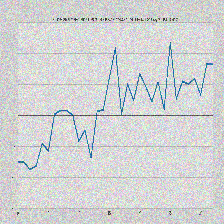

In [130]:
img = make_image('../data/train/3.png')
img = add_noise(img)
img.save(PATH + 'transform_noise.png')
img

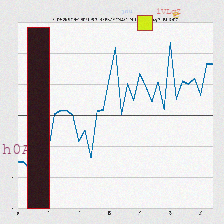

In [139]:
img = make_image('../data/train/3.png')
img = add_text(img)
img = rand_add_rect(img)
img = rand_add_shapes(img)
img = add_noise(img)
img.save(PATH + 'transform_all.png')
img